<a href="https://colab.research.google.com/github/OmkarKotwalProject/Pizza-Hut-Work/blob/main/Pizza_Hut_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [85]:
!pip install pyspellchecker
!pip install Counter

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io


uploaded = files.upload()
df= pd.read_excel(io.BytesIO(uploaded['All_Reviews_PH.xlsx']))

Saving All_Reviews_PH.xlsx to All_Reviews_PH.xlsx


In [92]:
#Keeping the original as it is.
df_review=df  

THIS IS A BACKUP LOAD OF ORIGINAL DATAFRAME, ONLY USE IF MESSED UP

In [88]:
# #FOR EMPTYING THE DATAFRAME
#df_review.drop(columns=['Review','Sentiment'],inplace=True)

In [90]:
# #FOR RELOADING WITH ORIGINAL RAW DATA
# df= pd.read_excel(io.BytesIO(uploaded['All_Reviews_PH.xlsx']))
# df_review=df

KeyError: ignored

BACKUP CODE END

In [93]:
print(df_review.head())
print(df_review.shape)

                                                                                                                                                                                      Review  \
0                                                                                                                                                                            tasteless pizza   
1                                                                                                                                                                           price is so high   
2  very very disappointed ? ? ? ? \nwhile ordering you didn't mentioned it is small.. you guys are f**king fooling us .... 400rs spent for 200rs pizza.... isse acha grand deke kamaho bc Mc   
3                                                                                                                                                               taste was not up to the mark   
4                      Open pizza box an

^[\w\s]=remove all except alphanumeric and whitespaces tabs and spaces [\d] remove digits

In [94]:
#REMOVING NUMBERS 
df_review['Review']=df_review['Review'].replace('\d+','',regex=True)

WHAT AM I TRYING TO DO HERE:-  Removing more than 2 consecutive occurrences of a character, if its a special char, replace with space

so @@@@@@ => @@ and then '__'. This will happen with words too, hellllloo => helloo


In [95]:
#WHAT AM I TRYING TO DO HERE:-  Removing more than 2 consecutive occurrences of a character, if its a special char, replace with space
# so @@@@@@ => @@ and then '__'. This will happen with words too, hellllloo => helloo
#1. REPLACE SPECIAL CHARACTERS BY ' ' AND then using regex, remove consecutive duplicates of ' ' i.e '         '  (big spaces between words)
df_review['Review']=df_review['Review'].replace('\n', ' ',regex=True)
df_review['Review']=df_review['Review'].replace(('[^!|^.|^,|^;|^-|^@|^\w\s]'),"", regex = True)
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(',', ' ')
  sentence=sentence.replace('!', ' ')
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(';', ' ')
  sentence=sentence.replace('-', ' ')
  sentence=sentence.replace('@', ' ')
  sentence=sentence.replace(')', ' ')
  sentence=sentence.replace('(', ' ')
  sentence=sentence.replace('{', ' ')
  sentence=sentence.replace('}', ' ')

  sentence=re.sub(r'(.)\1+', r'\1\1',sentence)   # yummmyyy => yummyy,  '     '=>'  '  #This line will remove char which occures more than 2 times consecutively.
  df_review['Review'][i]=sentence

#df_review['Review']=df_review['Review'].replace('[^\w\s]', '',regex=True)
print(df_review.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                                                                                                                                                  Review  \
0                                                                                                                                                        tasteless pizza   
1                                                                                                                                                       price is so high   
2        very very disappointed  while ordering you didnt mentioned it is small  you guys are fking fooling us  rs spent for rs pizza  isse acha grand deke kamaho bc Mc   
3                                                                                                                                           taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers  Sealing Tape not properly put  No point in blaming poor delivery person  Highly disappointing  

In [96]:
print(df_review.head())
print(df_review.tail())

                                                                                                                                                                  Review  \
0                                                                                                                                                        tasteless pizza   
1                                                                                                                                                       price is so high   
2        very very disappointed  while ordering you didnt mentioned it is small  you guys are fking fooling us  rs spent for rs pizza  isse acha grand deke kamaho bc Mc   
3                                                                                                                                           taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers  Sealing Tape not properly put  No point in blaming poor delivery person  Highly disappointing  

REMOVING CHARACTERS WHICH ONLY OCCUR ONCE! ALSO REPLACING TWO CONSECUTIVE SPACES BY ONE

In [97]:
cnter=0
while(cnter<2):
  for i in range(len(df_review)):
    new_sentence=" "
    sentence=df_review['Review'][i]    #get the row i.e. sentence
    #print("before removing:",df_review['Review'][i])
    words=sentence.split()  #makes a list of the words in the sentence
    for word in words:      #check every words length and if it is less than 2, remove it
      if len(word)<2:
        #print(word)
        words.remove(word)
    new_sentence=new_sentence.join(words) #Create a new sentence by joining all the words in the list with " " as a separator
    df_review['Review'][i]=new_sentence   #replace current row i.e. sentence by the new sentence
    #print("after removing:",df_review['Review'][i])
  cnter=cnter+1
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Print the rows with Missing NAN values

In [98]:
print(df_review[df_review.isna().any(axis=1)])

Empty DataFrame
Columns: [Review, Sentiment]
Index: []


In [99]:
print(df_review.head())

                                                                                                                                                             Review  \
0                                                                                                                                                   tasteless pizza   
1                                                                                                                                                  price is so high   
2       very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza isse acha grand deke kamaho bc Mc   
3                                                                                                                                      taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers Sealing Tape not properly put No point in blaming poor delivery person Highly disappointing not expected from Pizza Hut  

HOW MANY POSITIVE REVIEWS, HOW MANY NEGATIVE REVIEWS

In [100]:
print(df_review[df_review['Sentiment']==1].count())
print(df_review[df_review['Sentiment']==0].count())


Review       1972
Sentiment    1972
dtype: int64
Review       928
Sentiment    928
dtype: int64


Converting datatype of a column, here tried to convert float type of Sentiment to int

In [101]:
#print(df_review['Sentiment'].astype(int))

TRIAL CODE START! 
FINDING MISSPELLED WORDS AND CORRECTING THEM AS TEXTBLOB IS FOUND USELESS!

Algorithm used for correcting words:
1. Create a list of misspelled words found in the dataset.
2. Create a list of correctly spelled words found in the dataset.
3. Use similar() function of 'SequenceMatcher' for finding similarity between words from both lists. If it is greater than 0.8, create a dictionary (dict['misspelled word'=correctly spelled word.
4. Now traverse the dataset, while checking a row, extract its misspelled words, check if misspelled word is in the dictionary, if it is then replace it with correctly spelled word.

In [102]:
#This creates a list of sets of misspelled words found in each row.
from spellchecker import SpellChecker
spell=SpellChecker()
mis_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i].split()
  mis_sent=spell.unknown(sentence)
  mis_list.append(mis_sent)
  if set() in mis_list:
    mis_list.remove(set())
print("first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]: ",mis_list[0:50])

first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]:  [{'mc', 'fking', 'kamaho', 'isse', 'bc', 'rs'}, {'jalapeño'}, {'totallybwaste'}, {'oreganos'}, {'rs'}, {'compair', 'rs', 'pizaa'}, {'orgeno'}, {'uae', 'kababs'}, {'orderit'}, {'rd'}, {'zomato'}, {'chease', 'thanda'}, {'coustomer'}, {'zomato'}, {'ppl'}, {'xtra'}, {'origano'}, {'jst'}, {'zomato'}, {'whatsoeververy'}, {'coveredsecured'}, {'aftr', 'zomato'}, {'pls', 'rply'}, {'didntike'}, {'cheeze'}, {'wt'}, {'zomato'}, {'breadstix'}, {'recieve'}, {'rs'}, {'deshelved'}, {'pls'}, {'thanda'}, {'rs', 'bkc'}, {'contactless'}, {'whrn'}, {'rs'}, {'pls'}, {'detoraited'}, {'itoms'}, {'transperant', 'whyy'}, {'kabab'}, {'hogaya', 'lagta', 'aisa', 'seekh', 'kharab', 'kabab', 'khatta'}, {'pcs'}, {'pm', 'pls'}, {'servise'}, {'mazing'}, {'owsume', 'zomato'}, {'andngarlik', 'cheezy'}, {'incomplets'}]


In [103]:
#Creating a list of misspelled words. (Basically extracting each set element from the mis_list and putting it into mis_mis_list)

from collections import Counter
mis_mis_list=[]
for i in mis_list:
  for j in i:
    mis_mis_list.append(j.lower())   #just making the words lower before appending to mis_mis_list


#cnt=0
for i in mis_mis_list:        #removing 'rs', 'mr', 'ms' from the list as they aren't misspelled words in a way.
  if i=='rs':
    #cnt=cnt+1
    mis_mis_list.remove(i)
  if i=='mr':
    mis_mis_list.remove(i)
  if i=='ms':
    mis_mis_list.remove(i)    
print("first 50 Misspelled words:",mis_mis_list[0:50]) #LIST OF MISSPELLED WORDS   

#Creating this names_list, as names are needed to be removed from the misspelled words list. (It will be removed in the next cell)
names_list=['bkc','cst','zomato','pizzahut','bandra','kurla','kishor','kishore','nonveg','pm','shubhangi','afternoon','vegorama','birizza','covid','jain','dinin','chana','shravani','touheed']
print("Total misspelled words: ",len(mis_mis_list)) #Note: this list is not a 'unique mispelled words' list, it has repeated occurences of them.


#Finding common words and their occurrences in the mis_mis_list #Just a trial code for common words finder.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   
print(cmmn)

first 50 Misspelled words: ['mc', 'fking', 'kamaho', 'isse', 'bc', 'jalapeño', 'totallybwaste', 'oreganos', 'compair', 'pizaa', 'orgeno', 'uae', 'kababs', 'orderit', 'rd', 'zomato', 'chease', 'thanda', 'coustomer', 'zomato', 'ppl', 'xtra', 'origano', 'jst', 'zomato', 'whatsoeververy', 'coveredsecured', 'aftr', 'zomato', 'pls', 'rply', 'didntike', 'cheeze', 'wt', 'zomato', 'breadstix', 'recieve', 'deshelved', 'pls', 'thanda', 'bkc', 'contactless', 'whrn', 'pls', 'detoraited', 'itoms', 'transperant', 'whyy', 'kabab', 'hogaya']
Total misspelled words:  2217
[('bkc', 149), ('cst', 101), ('zomato', 46), ('bandra', 41), ('kishore', 35), ('kurla', 34), ('pizzahut', 31), ('thanku', 30), ('exotica', 28), ('kishor', 24), ('nonveg', 20), ('shubhangi', 19), ('pm', 17), ('nd', 17), ('yumm', 16), ('pls', 14), ('pizzaa', 13), ('plz', 12), ('frnds', 12), ('bt', 11), ('ppl', 10), ('cheezy', 10), ('panner', 10), ('st', 10), ('vegorama', 9), ('ph', 9), ('grt', 9), ('th', 9), ('bcoz', 9), ('afternoon', 8)

In [104]:
#REMOVING NAMES FROM THE LIST of misspelled words
for name in names_list:
  for j in range(len(mis_mis_list)):
    if name in mis_mis_list:
      mis_mis_list.remove(name)
print("Final Misspelled words list after removing names: (Showing only first 50) ",mis_mis_list[0:50]) #This is the list of misseplled words!



#Trial code for common words finder, again.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)    


Final Misspelled words list after removing names: (Showing only first 50)  ['mc', 'fking', 'kamaho', 'isse', 'bc', 'jalapeño', 'totallybwaste', 'oreganos', 'compair', 'pizaa', 'orgeno', 'uae', 'kababs', 'orderit', 'rd', 'chease', 'thanda', 'coustomer', 'ppl', 'xtra', 'origano', 'jst', 'whatsoeververy', 'coveredsecured', 'aftr', 'pls', 'rply', 'didntike', 'cheeze', 'wt', 'breadstix', 'recieve', 'deshelved', 'pls', 'thanda', 'contactless', 'whrn', 'pls', 'detoraited', 'itoms', 'transperant', 'whyy', 'kabab', 'hogaya', 'lagta', 'aisa', 'seekh', 'kharab', 'kabab', 'khatta']
[('thanku', 30), ('exotica', 28), ('nd', 17), ('yumm', 16), ('pls', 14), ('pizzaa', 13), ('plz', 12), ('frnds', 12), ('bt', 11), ('ppl', 10), ('cheezy', 10), ('panner', 10), ('st', 10), ('ph', 9), ('grt', 9), ('th', 9), ('bcoz', 9), ('hygenic', 7), ('varities', 7), ('hr', 7), ('pizaa', 6), ('rd', 6), ('origano', 6), ('jst', 6), ('cheeze', 6), ('kabab', 6), ('nyc', 6), ('awsm', 6), ('gr', 6), ('vist', 5), ('vfm', 5), ('y

In [106]:
#Finding a list of correctly spelled words!
#first, just creating a list of words found in the dataset
correct_word_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  words=sentence.split()
  for word in words:
    correct_word_list.append(word.lower())
print(correct_word_list[0:50])


  

['tasteless', 'pizza', 'price', 'is', 'so', 'high', 'very', 'very', 'disappointed', 'while', 'ordering', 'you', 'didnt', 'mentioned', 'it', 'is', 'small', 'you', 'guys', 'are', 'fking', 'fooling', 'us', 'rs', 'spent', 'for', 'rs', 'pizza', 'isse', 'acha', 'grand', 'deke', 'kamaho', 'bc', 'mc', 'taste', 'was', 'not', 'up', 'to', 'the', 'mark', 'open', 'pizza', 'box', 'and', 'open', 'jalapeño', 'poppers', 'sealing']


In [ ]:
#JUST A NOTE, SPELLCHECKER DOES NOT CONSIDER 'didnt,wasnt,cant...' AS MISSPELLED WORDS

In [107]:
#We have to make both lists mis_mis_list and correct_words_list contain unique words, not repeated words or 'remove' won't work!
print("total of all words of misspelled word list:",len(mis_mis_list))
print("total of all words of correct word list+misspelled word list:",len(correct_word_list))
mis_mis_list=list(set(mis_mis_list))
correct_word_list=list(set(correct_word_list))
print("total of unique words of misspelled word list:",len(mis_mis_list))
print("total of unique words of correct word list+missplled word list:",len(correct_word_list))
print("total of unique words of names list:",len(names_list))

total of all words of misspelled word list: 1656
total of all words of correct word list+misspelled word list: 104203
total of unique words of misspelled word list: 1100
total of unique words of correct word list+missplled word list: 5778
total of unique words of names list: 20


In [108]:
print("correct word list length before removing misspelled words and names:",len(correct_word_list))
names_list=['bkc','cst','zomato','pizzahut','bandra','kurla','kishor','kishore','nonveg','pm','shubhangi','afternoon','vegorama','birizza','covid','jain','dinin','chana','shravani','touheed']
cnt=0
#Removing misspelled words from correct_word_list, found in mis_mis_list
for w in mis_mis_list:
  if w in correct_word_list:
    correct_word_list.remove(w)

#Removing names from correct_word_list, found in names_list
for n in names_list:
  if n in correct_word_list:
    correct_word_list.remove(n) 
print("correct word list length after removing misspelled words and names:",len(correct_word_list))

correct word list length before removing misspelled words and names: 5778
correct word list length after removing misspelled words and names: 4659


In [109]:
#The only misspelled words in word_list

mis_words=spell.unknown(correct_word_list)
print(mis_words)

{'ms', 'mr'}


In [110]:
#Checking similarity between words from correct_word_list and mis_mis_list, if its more than 0.8, 
#do dictionary[misspelled word]=correct word
#TAKES 1 MINUTE+
from difflib import SequenceMatcher       #Library used for checking similarity

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()    #Function to check similarity!

dictionary={}
cnt=0
for cor_word in correct_word_list:
  for mis_word in mis_mis_list:
    ratio=similar(cor_word,mis_word)
    if(ratio>0.8):
      cnt=cnt+1
      dictionary[mis_word]=cor_word
      #print("Correct word:",cor_word,"    misspelled word:",mis_word,"      Ratio:",ratio)
print("This many words can be corrected: ",cnt)

This many words can be corrected:  922


In [37]:
#Saving the dictionary to a text file
try:
  dict_file=open("dict_file.txt","w")
  dict_file.write(str(dictionary))
  dict_file.close()
except Exception as e:
  print("{}".format(e))

In [111]:
#This is how dictionary is 
dictionary['jst']

'just'

In [112]:
#Replacing the misspelled words with correct words
#Takes almost 10 seconds
words_corrected_cnt=0
for i in range(len(df_review)):
  sentence=(df_review['Review'][i]).lower()
  print("before:",sentence)
  misspelled_words=spell.unknown(sentence.split())
  print("list:",misspelled_words)
  for misword in misspelled_words:
    if misword in dictionary:
      correct_word=dictionary[misword]
      print("misspelled word: ",misword,"     ","correct word:",correct_word)
      sentence=sentence.replace(misword,correct_word)
      words_corrected_cnt=words_corrected_cnt+1
  df_review['Review'][i]=sentence
  print("After:",sentence)

before: tasteless pizza
list: set()
After: tasteless pizza
before: price is so high
list: set()
After: price is so high
before: very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza isse acha grand deke kamaho bc mc
list: {'mc', 'fking', 'kamaho', 'isse', 'bc', 'rs'}
misspelled word:  fking       correct word: king
misspelled word:  isse       correct word: issue
After: very very disappointed while ordering you didnt mentioned it is small you guys are king fooling us rs spent for rs pizza issue acha grand deke kamaho bc mc
before: taste was not up to the mark
list: set()
After: taste was not up to the mark
before: open pizza box and open jalapeño poppers sealing tape not properly put no point in blaming poor delivery person highly disappointing not expected from pizza hut
list: {'jalapeño'}
misspelled word:  jalapeño       correct word: jalapenos
After: open pizza box and open jalapenos poppers sealing tape not properl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
before: the ambience is good like any other pizza hut outlet ive been to the service is bit slow the food is good ive always been in love with their pan pizzas the staff is friendly
list: set()
After: the ambience is good like any other pizza hut outlet ive been to the service is bit slow the food is good ive always been in love with their pan pizzas the staff is friendly
before: food is awesome bt there is always an issue with air condition most of the time they saying its not working out of time it happens service is good as staff member is co operative thank an pls work on ac issues
list: {'pls', 'bt'}
misspelled word:  pls       correct word: pals
After: food is awesome bt there is always an issue with air condition most of the time they saying its not working out of time it happens service is good as staff member is co operative thank an pals work on ac issues
before: was little bit hungry after my college lectures so catch the de

In [113]:
#This many words were corrected and replaced
print(words_corrected_cnt)

865


In [114]:
#How the similar() function works
print(similar('unfar','unfair'))

0.9090909090909091


WORD COUNT PROGRAM

In [45]:
#Just a trial code!

p_list=[]
for i in range(2900):
  ent=df_review['Review'][i].split()
  p_list.append(ent)

word_list=[]
for element in p_list:
  for word in element:
    word_list.append(word)
print(len(word_list))

104203


WORD COUNT PROGRAM END!

TRIAL CODE END!

In [115]:
print(df_review['Review'].head())

0                                                                                                                                                      tasteless pizza
1                                                                                                                                                     price is so high
2          very very disappointed while ordering you didnt mentioned it is small you guys are king fooling us rs spent for rs pizza issue acha grand deke kamaho bc mc
3                                                                                                                                         taste was not up to the mark
4    open pizza box and open jalapenos poppers sealing tape not properly put no point in blaming poor delivery person highly disappointing not expected from pizza hut
Name: Review, dtype: object


Stopwords

In [116]:
from nltk.corpus import stopwords
sw=stopwords.words("english")
print(sw)
#Removing the words below from the stopword list as they do impact the outcome when doing sentiment analysis. 
sw.append('would')
words=['no','not']
sw.remove('not')
sw.remove('no')
#sw.remove('never')
sw.remove('don\'t')
sw.remove('didn\'t')
sw.remove('wouldn\'t')
sw.remove('wouldn')
sw.remove('won\'t')
sw.remove('didn')
sw.remove('don')
sw.remove('isn\'t')
sw.remove('isn')
#sw.remove('can\'t')
sw.remove('couldn\'t')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Making 'Review' lower so I can remove stopwords

In [117]:
df_review['Review']=df_review['Review'].str.lower()

In [118]:
df_review['Review']=df_review['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))
print(df_review.head())

                                                                                                                                                  Review  \
0                                                                                                                                        tasteless pizza   
1                                                                                                                                             price high   
2                                  disappointed ordering didnt mentioned small guys king fooling us rs spent rs pizza issue acha grand deke kamaho bc mc   
3                                                                                                                                         taste not mark   
4  open pizza box open jalapenos poppers sealing tape not properly put no point blaming poor delivery person highly disappointing not expected pizza hut   

   Sentiment  
0          0  
1          0  
2          0  
3  

In [119]:
#TOTAL WORDS AFTER REMOVING STOP WORDS!
p_list=[]
for i in range(2900):
  ent=df_review['Review'][i].split()
  p_list.append(ent)

word_list=[]
for element in p_list:
  for word in element:
    word_list.append(word)
print(len(word_list))

62141


TOKENIZATION

In [120]:
#Tokenization done to apply Lemmatization
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

df_review['Review']=df_review.Review.apply(lemmatize_text)
print(df_review.head())

                                                                                                                                                                Review  \
0                                                                                                                                                   [tasteless, pizza]   
1                                                                                                                                                        [price, high]   
2                                      [disappoint, order, didnt, mention, small, guy, king, fool, us, rs, spend, rs, pizza, issue, acha, grand, deke, kamaho, bc, mc]   
3                                                                                                                                                   [taste, not, mark]   
4  [open, pizza, box, open, jalapenos, poppers, seal, tape, not, properly, put, no, point, blame, poor, delivery, person, highly, disappoint, not, exp

From tokenized to normal

In [121]:
df_review['NewReview'] = df_review['Review'].apply(lambda s1: ' '.join(map(str,s1)) )


print(df_review['NewReview'].head())

0                                                                                                                                tasteless pizza
1                                                                                                                                     price high
2                                     disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc
3                                                                                                                                 taste not mark
4    open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut
Name: NewReview, dtype: object


In [122]:
df_review['NewReview']=df_review['NewReview'].str.lower()
df_review.head()

,Review,Sentiment,NewReview
0,"[tasteless, pizza]",0,tasteless pizza
1,"[price, high]",0,price high
2,"[disappoint, order, didnt, mention, small, guy, king, fool, us, rs, spend, rs, pizza, issue, acha, grand, deke, kamaho, bc, mc]",0,disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc
3,"[taste, not, mark]",0,taste not mark
4,"[open, pizza, box, open, jalapenos, poppers, seal, tape, not, properly, put, no, point, blame, poor, delivery, person, highly, disappoint, not, expect, pizza, hut]",0,open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut


Sentiment Analysis

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
train_data,test_data=train_test_split(df_review,test_size=0.4,random_state=25)


In [125]:
#test data= 1160 data points
#train data= 1740 data points
print(test_data.shape)
print('test_data(Positive):',test_data[test_data['Sentiment']==1].count())
print('test_data(Negative):',test_data[test_data['Sentiment']==0].count())

print("train_data (Positive):",train_data[train_data['Sentiment']==1].count())
print('train_data (Negative):',train_data[train_data['Sentiment']==0].count())

(1160, 3)
test_data(Positive): Review       782
Sentiment    782
NewReview    782
dtype: int64
test_data(Negative): Review       378
Sentiment    378
NewReview    378
dtype: int64
train_data (Positive): Review       1190
Sentiment    1190
NewReview    1190
dtype: int64
train_data (Negative): Review       550
Sentiment    550
NewReview    550
dtype: int64


In [126]:
X_train=train_data['NewReview']
y_train=train_data['Sentiment']
X_test=test_data['NewReview']
y_test=test_data['Sentiment']

In [127]:
print(X_train.head())
print(X_test.head())

3                                                                                                                                                                                                                                                                                               taste not mark
1648                                                                                                                           service wasnt per expect waiters dont respond even call repeatedly even air condition restaurant not work plus many mistake order didnt receive order right time bad experience
2020                                                                                                                                                                   good pizzas definitely rate higher dominos prompt service value meal options available fly buzz around restaurant need take care though
2397    pizza worth rat garlic bread provide cutlery eat place use good place decide switch

Vectorizer

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

TRIAL CODE START! DON'T USE THE CODE BELOW, ITS JUST FOR PRINTING WORDS AND THEIR TF-IDF VALUES

In [ ]:
# tfIdfVectorizer=TfidfVectorizer(use_idf=True)
# tfIdf = tfIdfVectorizer.fit_transform(X_train)
# df_abc = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
# df_abc = df_abc.sort_values('TF-IDF', ascending=False)
# print (df_abc.head(5))

TRIAL CODE END!

In [129]:
train_vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii')
train_review_tfidf=train_vectorizer.fit_transform(X_train)

In [130]:
print(train_review_tfidf.shape)
type(train_review_tfidf)

(1740, 3248)


scipy.sparse.csr.csr_matrix

printing first 5 elements and other is about ngrams

In [ ]:
#print(review_tfidf.toarray()[1:5])
#train_vectorizer_ngram=TfidfVectorizer(ngram_range=(2,3))
#review_tfidf_ngram=train_vectorizer_ngram.fit_transform(X)

In [ ]:
#Ignore this code cell

print(y_train.head())
print(y_train.shape)
print(train_review_tfidf.shape)

3       0
1648    0
2020    1
2397    0
2243    1
Name: Sentiment, dtype: int64
(1740,)
(1740, 3247)


LOGISTIC REGRESSION

In [131]:
log_model=LogisticRegression().fit(train_review_tfidf, y_train)

In [132]:
cross_val_score(log_model,train_review_tfidf,y_train,scoring='accuracy',cv=5).mean()

0.9298850574712644


TESTING

In [133]:
#USE THIS WHEN TESTING ON SPLIT TEST DATA
nr=train_vectorizer.transform(X_test)
log_model.predict(nr)

#USE THIS WHEN TESTING ON WHOLE DATASET
# nr=train_vectorizer.transform(df_review['NewReview'])
# log_model.predict(nr)


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# print("Accuracy: ",cross_val_score(log_model,nr,y_test,scoring='accuracy',cv=5).mean())
# print("Precision: ",cross_val_score(log_model,nr,y_test,scoring='precision',cv=5).mean())
# print("Recall: ",cross_val_score(log_model,nr,y_test,scoring='recall',cv=5).mean())
# print("F1 score :",cross_val_score(log_model,nr,y_test,scoring='f1',cv=5).mean())

 
  
  
#cross_val_score(log_model,nr,df_review['Sentiment'],scoring='accuracy',cv=5).mean()

Accuracy:  0.9301724137931036
Precision:  0.9239289537903218
Recall:  0.9769965703086723
F1 score : 0.9496567860161017


In [134]:
predicted=log_model.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test
# actual=df_review['Sentiment']

In [70]:
print(p.dtypes)

0    int64
dtype: object


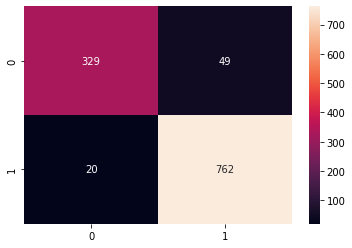

In [135]:
import seaborn as sns
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [136]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       378
           1       0.94      0.97      0.96       782

    accuracy                           0.94      1160
   macro avg       0.94      0.92      0.93      1160
weighted avg       0.94      0.94      0.94      1160



Applying SVM

In [137]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(train_review_tfidf,y_train)

SVC(kernel='linear')

In [74]:
# sentence=['The order was delivered after 1 hour. Meanwhile I tried calling them but they put me on hold every time. On receiving the order I paid the money and then realized that instead of cheese burst chicken pizza a veg non cheese burst pizza was delivered, moreover it was completely cold...']
# nr1=train_vectorizer.transform(sentence)
# svclassifier.predict(nr1)

array([0])

In [138]:
nr=train_vectorizer.transform(X_test)
svclassifier.predict(nr)

array([1, 1, 1, ..., 0, 1, 1])

In [139]:
predicted=svclassifier.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test

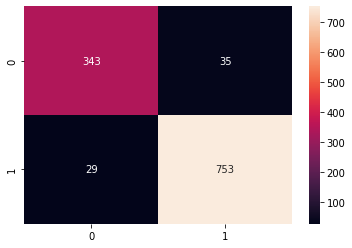

In [140]:
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [141]:
cross_val_score(svclassifier,train_review_tfidf,y_train,scoring='accuracy',cv=5).mean()

0.9321839080459771

In [ ]:
# print("Accuracy: ",cross_val_score(svclassifier,nr,y_test,scoring='accuracy',cv=5).mean())
# print("Precision: ",cross_val_score(svclassifier,nr,y_test,scoring='precision',cv=5).mean())
# print("Recall: ",cross_val_score(svclassifier,nr,y_test,scoring='recall',cv=5).mean())
# print("F1 score :",cross_val_score(svclassifier,nr,y_test,scoring='f1',cv=5).mean())

Accuracy:  0.9301724137931033
Precision:  0.9510731306909651
Recall:  0.945043279438184
F1 score : 0.9480290403702132


In [142]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       378
           1       0.96      0.96      0.96       782

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160



In [80]:
print(df_review[df_review['Sentiment']==0].NewReview.shape)

(928,)


# Latent Dirichlet Allocation

LDA WITH 5 TOPICS

In [ ]:
# from sklearn.decomposition import LatentDirichletAllocation 
# num_components=4

# lda=LatentDirichletAllocation(n_components=num_components)

# nr_vectorized_neg_reviews=train_vectorizer.transform(df_review[df_review['Sentiment']==0].NewReview)

# lda_matrix=lda.fit_transform(nr_vectorized_neg_reviews)

# lda_model_components=lda.components_



In [ ]:
# #printing the topics with their terms
# terms=train_vectorizer.get_feature_names()

# for index, component in enumerate(lda_model_components):
#   zipped=zip(terms,component)
#   top_terms_key=sorted(zipped, key=lambda t:t[1], reverse=True)[:10]
#   top_terms_list=list(dict(top_terms_key).keys())
#   print("Topic "+str(index)+": ",top_terms_list)

JUST A TRIAL!

In [ ]:
# uploaded=files.upload()
# dominos_df=pd.read_excel(io.BytesIO(uploaded['All_Reviews_DP.xlsx']))

In [ ]:
# dominos_df.head()

In [ ]:
# xtest = dominos_df['Review'][0:200]
# ytest = dominos_df['Sentiment'][0:200].astype('int')

In [ ]:
# type(ytest)

In [ ]:
# #Logistic Model
# nr=train_vectorizer.transform(list(xtest))
# log_predicted_values=log_model.predict(nr)
# log_actual_values=ytest

# #SVM Model
# svm_predicted_values=svclassifier.predict(nr)
# svm_actual_values=ytest

In [ ]:
# #Logistic Model Performance
# print("Logistic Model Accuracy: ",cross_val_score(log_model,nr,log_actual_values,scoring='accuracy',cv=5).mean())
# print("Logistic Model Precision: ",cross_val_score(log_model,nr,log_actual_values,scoring='precision',cv=5).mean())
# print("Logistic Model Recall: ",cross_val_score(log_model,nr,log_actual_values,scoring='recall',cv=5).mean())
# print("Logistic Model F1 score :",cross_val_score(log_model,nr,log_actual_values,scoring='f1',cv=5).mean())

# #SVM Model Performance
# print("SVM Model Accuracy: ",cross_val_score(svclassifier,nr,ytest,scoring='accuracy',cv=5).mean())
# print("SVM Model Precision: ",cross_val_score(svclassifier,nr,ytest,scoring='precision',cv=5).mean())
# print("SVM Model Recall: ",cross_val_score(svclassifier,nr,ytest,scoring='recall',cv=5).mean())
# print("SVM Model F1 score :",cross_val_score(svclassifier,nr,ytest,scoring='f1',cv=5).mean())

In [ ]:
# #predicted=pd.DataFrame(predicted)
# print(predicted)

In [ ]:
# pd.set_option("display.max_rows",None)

CREATED A DATAFRAME OF 'ACTUAL' 'PREDICTED' 'REVIEWS'

In [ ]:
fin_df=pd.DataFrame()
fin_df['Actual']=actual
fin_df['Predicted']=predicted
fin_df['Reviews']=X_test
#print(fin_df)

In [145]:
print(fin_df.head())
print("\n\n\n\n")
print(fin_df.tail())

      Actual  Predicted  \
2051       1          1   
732        1          1   
2550       1          1   
2446       1          1   
1834       1          1   

                                                                                                                                                                                                    Reviews  
2051                                                                                 great place pizza hut food also amaze comfortable offer friendly staff restaurant good clean enjoy ur friends birthday  
732   self service place visit place wife one yr old kid staff cooperative helpful suggestions helpful decide menu food outstanding drawback no park place bpcl petrol pump guy not allow park even minutes  
2550                                                                                                                                 wow wow wow owesme service pizza yummy lovee good place hangout friend  
2446         

In [ ]:
# print(fin_df)

In [ ]:
# fin_df['Reviews']=xtest

In [ ]:
# print(fin_df.head(20))

In [ ]:
# fin_df.to_csv('result.csv')